## ACO501: Phase 2/3 Pandas Data Wrangling
## Daniel Bihnam

### Import packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Read in CSV files

In [2]:
taxonomyData = pd.read_csv('IUCNHierarchyAndExtinction.csv')
taxonomyData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   taxonid                187 non-null    int64  
 1   assessmentid           187 non-null    int64  
 2   kingdom                187 non-null    object 
 3   phylum                 187 non-null    object 
 4   class                  187 non-null    object 
 5   order                  187 non-null    object 
 6   family                 187 non-null    object 
 7   genus                  187 non-null    object 
 8   species                187 non-null    object 
 9   infrarank              0 non-null      float64
 10  infratype              0 non-null      float64
 11  subpopulation          0 non-null      float64
 12  friendly_name          187 non-null    object 
 13  taxonomic_authority    187 non-null    object 
 14  category               187 non-null    object 
 15  criter

In [3]:
countryData = pd.read_csv('IUCNSpeciesCountryOccurances.csv')
countryData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17825 entries, 0 to 17824
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   taxonid                        17825 non-null  int64 
 1   assessmentid                   17825 non-null  int64 
 2   recordid                       17825 non-null  int64 
 3   countryoccurrencelookup        17825 non-null  int64 
 4   countryoccurrencelookup_value  17543 non-null  object
 5   formerlybred                   17825 non-null  int64 
 6   formerlybred_value             52 non-null     object
 7   origin                         17825 non-null  int64 
 8   origin_value                   17543 non-null  object
 9   presence                       17825 non-null  int64 
 10  presence_value                 17543 non-null  object
 11  seasonality                    17825 non-null  int64 
 12  seasonality_value              6223 non-null   object
dtypes

### Visualize data

In [4]:
taxonomyData.head()

,taxonid,assessmentid,kingdom,phylum,class,order,family,genus,species,infrarank,...,taxonomic_authority,category,criteria,possibly_extinct,possibly_extinct_wild,assessmentdate,assessors,evaluators,contributors,facilitators
0,17026,1306343,ANIMALIA,CHORDATA,MAMMALIA,CARNIVORA,OTARIIDAE,Phocarctos,hookeri,NaN,...,"(Gray, 1844)",EN,A4bd,False,False,18-Nov-14,"Chilvers, B.L.","Goldsworthy, S.D.","Gales, N.J.","Lowry, L., Chiozza, F., Ahonen, H. & Battiston..."
1,22103,9356917,ANIMALIA,CHORDATA,MAMMALIA,SIRENIA,TRICHECHIDAE,Trichechus,manatus,NaN,...,"Linnaeus, 1758",VU,C1,False,False,30-Jun-08,"Deutsch, C.J., Self-Sullivan, C. & Mignucci-Gi...","Reynolds III, J.E. & Powell, J.A. (Sirenia Red...",NaN,NaN
2,10303,43792683,ANIMALIA,CHORDATA,MAMMALIA,SIRENIA,DUGONGIDAE,Hydrodamalis,gigas,NaN,...,"(Zimmermann, 1780)",EX,NaN,False,False,04-Apr-16,"Domning, D.","Morales-Vela, B.",NaN,NaN
3,22102,43793736,ANIMALIA,CHORDATA,MAMMALIA,SIRENIA,TRICHECHIDAE,Trichechus,inunguis,NaN,...,"(Natterer, 1883)",VU,A3cd,False,False,28-Feb-16,"Marmontel, M., de Souza, D. & Kendall, S.","Morales-Vela, B., Castelblanco-Martínez, D.N. ...","Alves dos Santos, G., Carvalho de Carvalho, C....",NaN
4,4162,44199757,ANIMALIA,CHORDATA,MAMMALIA,CETARTIODACTYLA,DELPHINIDAE,Cephalorhynchus,hectori,NaN,...,"(van Beneden, 1881)",EN,A4d,False,False,01-Jul-08,"Reeves, R.R., Dawson, S.M., Jefferson, T.A., K...","Brownell Jr., R.L. & Cooke, J.",NaN,NaN


In [5]:
countryData.head()

,taxonid,assessmentid,recordid,countryoccurrencelookup,countryoccurrencelookup_value,formerlybred,formerlybred_value,origin,origin_value,presence,presence_value,seasonality,seasonality_value
0,1793,7636887,7636947,618,NE Niger,0,NaN,1,Native,1,Extant,0,NaN
1,1793,7636887,7636951,600,GH Ghana,0,NaN,1,Native,1,Extant,0,NaN
2,1793,7636887,7636955,576,AO Angola,0,NaN,1,Native,1,Extant,0,NaN
3,1793,7636887,7636959,583,CM Cameroon,0,NaN,1,Native,1,Extant,0,NaN
4,1793,7636887,7636963,615,NA Namibia,0,NaN,1,Native,1,Extant,0,NaN


### Create and Process Dataframes

#### Family

In [6]:
#Copy column to new dataframe
family = taxonomyData[['family']].copy()
#Rename column
family = family.rename(columns = {'family': 'fName'})
family.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   fName   187 non-null    object
dtypes: object(1)
memory usage: 1.6+ KB


In [7]:
#Drop duplicates
family = family.drop_duplicates()
family.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 0 to 168
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   fName   16 non-null     object
dtypes: object(1)
memory usage: 256.0+ bytes


#### Genus

In [8]:
#Copy columns to new dataframe
genus = taxonomyData[['family', 'genus']].copy()
#Rename columns
genus = genus.rename(columns = {'family': 'fName', 'genus': 'gName'})
genus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   fName   187 non-null    object
 1   gName   187 non-null    object
dtypes: object(2)
memory usage: 3.0+ KB


In [9]:
#Drop duplicates
genus = genus.drop_duplicates()
genus.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82 entries, 0 to 183
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   fName   82 non-null     object
 1   gName   82 non-null     object
dtypes: object(2)
memory usage: 1.9+ KB


#### Species

In [10]:
#Copy columns to new dataframe
species = taxonomyData[['taxonid', 'species', 'friendly_name', 'category', 'genus']].copy()
#Rename columns
species = species.rename(columns = {'taxonid': 'taxonID', 'species': 'sName',
                                    'friendly_name': 'friendlyName', 'genus': 'gName'})
species.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   taxonID       187 non-null    int64 
 1   sName         187 non-null    object
 2   friendlyName  187 non-null    object
 3   category      187 non-null    object
 4   gName         187 non-null    object
dtypes: int64(1), object(4)
memory usage: 7.4+ KB


In [11]:
#Drop duplicates
#species = species.drop_duplicates()
#species.info()

#No duplicates were found

#### Country

In [12]:
#Copy columns to new dataframe
country = countryData[['taxonid', 'countryoccurrencelookup_value']].copy()
#Rename columns
country = country.rename(columns = {'taxonid': 'taxonID'})
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17825 entries, 0 to 17824
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   taxonID                        17825 non-null  int64 
 1   countryoccurrencelookup_value  17543 non-null  object
dtypes: int64(1), object(1)
memory usage: 278.6+ KB


In [ ]:
#Split country column into its abbreviation and full name
country[['countryAbbr', 'countryName']] = country['countryoccurrencelookup_value'].str.strip().str.split(' ', n=1, expand=True)
#Drop original combined country column
country.drop('countryoccurrencelookup_value', axis=1, inplace=True)
country.info()

In [ ]:
#Drop rows with missing countries
country = country.dropna(subset = ['countryAbbr', 'countryName'])
country.info()

In [24]:
#One taxonID can have many location
#Drop duplicates with non-unique combination of all columns
country = country.drop_duplicates(subset=['taxonID', 'countryAbbr', 'countryName'],
                                  keep='first')
country.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6572 entries, 0 to 17824
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   taxonID      6572 non-null   int64 
 1   countryAbbr  6572 non-null   object
 2   countryName  6572 non-null   object
dtypes: int64(1), object(2)
memory usage: 205.4+ KB


### Save Dataframes as CSV Files

In [25]:
family.to_csv('family.csv', index = False)
genus.to_csv('genus.csv', index = False)
species.to_csv('species.csv', index = False)
country.to_csv('country.csv', index = False)

### Import Queried Data

In [26]:
threatenedData = pd.read_csv('threatenedFamilies.csv')
threatenedData.head(15)

,fName,threatenedSpeciesCount
0,OTARIIDAE,5
1,BALAENOPTERIDAE,3
2,DELPHINIDAE,8
3,PHOCIDAE,4
4,DUGONGIDAE,1
5,MUSTELIDAE,13
6,INIIDAE,1
7,ODOBENIDAE,1
8,PHOCOENIDAE,3
9,TRICHECHIDAE,3


### Pie Chart Visualization

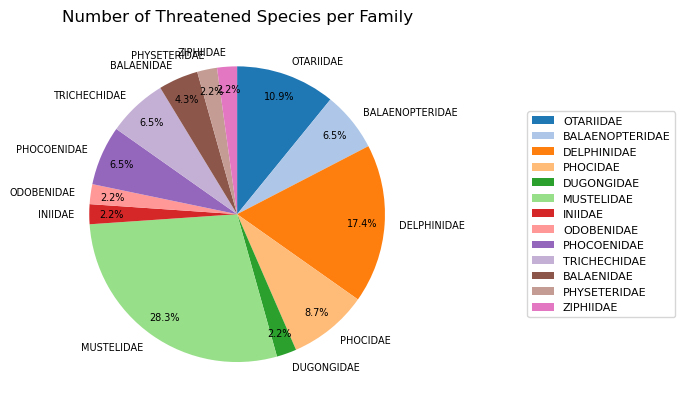

In [27]:
#Get values from dataframe
familyNames = threatenedData['fName']
threatenedSpeciesCount = threatenedData['threatenedSpeciesCount']

#Plot pie chart
plt.pie(threatenedSpeciesCount, labels = familyNames, 
        startangle = 90, counterclock = False, 
        autopct='%1.1f%%', pctdistance=0.85, colors = plt.cm.tab20.colors,
        textprops = {'fontsize' : 7})

#Plot legeng
plt.legend(familyNames, loc = 'center right',
          bbox_to_anchor=(1.7, 0.5), fontsize=8)

#Add information to the plot
plt.title('Number of Threatened Species per Family')

#Show plot
plt.show()